In [1]:
# pip install ipython-sparql-pandas
# run `sparql?` in a cell for documentation
%load_ext ipython_sparql_pandas
import pandas as pd
import numpy as np

First, make sure that `vuDataset.ttl` is loaded in GraphDb as the `repo-vu` repository.

In [2]:
%%sparql http://localhost:7200/repositories/repo-vu -s courseload
PREFIX vu: <http://example.org/vu/>

SELECT ?teacher (COUNT(*) as ?courses) {
    ?teacher vu:teaches ?o .
} GROUP BY ?teacher



teacher  courses
0  http://example.org/vu/stefan        5
1   http://example.org/vu/frank        3
2     http://example.org/vu/joe        1

<AxesSubplot:ylabel='courses'>

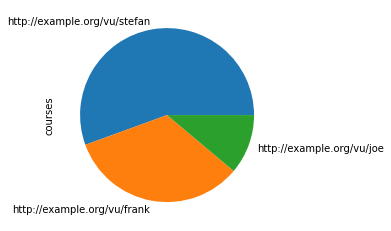

In [3]:
# Pandas visualization: https://pandas.pydata.org/docs/user_guide/visualization.html
courseload.set_index('teacher', inplace=True)
courseload['courses'].plot.pie()

<AxesSubplot:ylabel='teacher'>

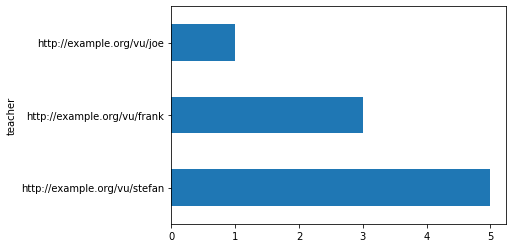

In [4]:
### Assignment 5-1a: Make a horizontal bar chart from the `courseload` dataframe
courseload['courses'].plot.barh(stacked=True)

In [5]:
%load_ext ipython_sparql_pandas

The ipython_sparql_pandas extension is already loaded. To reload it, use:
  %reload_ext ipython_sparql_pandas


In [6]:
%%sparql http://dbpedia.org/sparql/ -qs foo
    In 
PREFIX dbo: <http://dbpedia.org/ontology/>
SELECT distinct ?country count(?officialLanguage) as ?numlangWHERE {
      ?country a dbo:Country .
      ?country dbo:officialLanguage ?officialLanguage .

} group by ?country order by desc (count(?officialLanguage))
    LIMIT 10

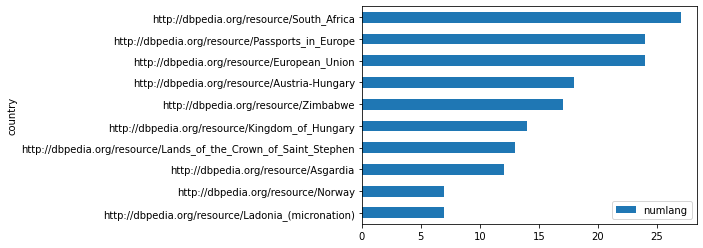

In [7]:
foo.plot.barh('country', 'numlang').invert_yaxis()